In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read the CSV files
df1 = pd.read_csv('database_AUS.csv')
df2 = pd.read_csv('database_IND.csv')
df3 = pd.read_csv('database_USA.csv')

# Combine the DataFrames
df = pd.concat([df1, df2, df3], ignore_index=True)

df


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
13294,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
13295,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


 This dataset contain 13298 columns and 27 rows. It is a Classification task.

In [2]:
df.head(100)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AUS,Australia,Cluny,AUS0000125,17.00,-42.5064,146.6812,Hydro,NaN,NaN,...,2019.0,76.832222,94.140000,81.428056,75.038611,62.451111,18.212500,NaN,Australia Clean Energy Regulator,NaN
96,AUS,Australia,Cockburn,AUS0000183,240.00,-32.2001,115.7737,Gas,NaN,NaN,...,2019.0,496.624167,1122.464722,658.150000,638.180556,363.930556,118.035000,NaN,Australia Clean Energy Regulator,NaN
97,AUS,Australia,Codrington Wind Farm,AUS0000015,18.20,-38.2835,141.9547,Wind,NaN,NaN,...,2019.0,NaN,44.778056,44.698333,41.116389,41.481944,43.585278,NaN,Australia Clean Energy Regulator,NaN
98,AUS,Australia,Collgar Wind Farm,AUS0000307,206.00,-31.5432,118.4566,Wind,NaN,NaN,...,2019.0,605.560833,696.651667,712.890278,670.706667,696.305833,715.499722,NaN,Australia Clean Energy Regulator,NaN


In [52]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
13291,2,0,11258,5767,7.0,0.500779,-0.266556,12,5,7,...,2019.0,-0.260958,-0.280290,-0.276568,-0.267644,-0.265911,-0.266526,-0.346453,2,0
13292,2,0,11259,1722,18.0,0.238863,-0.234244,3,5,7,...,2019.0,-0.283900,-0.302465,-0.297073,-0.287418,-0.283995,-0.280921,-1.563602,2,0
13293,2,0,11260,6385,3.4,0.526135,-0.105016,13,5,7,...,2019.0,-0.282066,-0.301388,-0.296430,-0.286668,-0.283425,-0.279648,-1.309567,2,0
13294,2,0,11261,9618,1.0,0.615473,-0.337343,10,5,7,...,2019.0,-0.282066,-0.301388,-0.296430,-0.286668,-0.283425,-0.280340,-1.237548,2,0
13297,2,0,11262,7774,9.8,0.381065,-0.624053,3,5,7,...,2019.0,-0.277150,-0.279321,-0.265423,-0.251835,-0.248150,-0.245460,1.070629,2,0


In [42]:
# Handle missing values by filling with mean for numerical columns
df.fillna(df.mean(), inplace=True)

# For non-numeric columns, fill missing values with a placeholder
df.fillna('missing', inplace=True)


In [53]:
df.columns
print('The Dimension of the dataset:',df.shape)
print('The Column header in the dataset:',df.columns)

The Dimension of the dataset: (11288, 27)
The Column header in the dataset: Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')


In [43]:
# Convert all entries in non-numeric columns to strings
non_numeric_columns = df.select_dtypes(include=['object']).columns
df[non_numeric_columns] = df[non_numeric_columns].astype(str)


In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Apply label encoding to each categorical feature
for column in non_numeric_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Also encode the target variable 'primary_fuel' for classification
fuel_le = LabelEncoder()
df['primary_fuel'] = fuel_le.fit_transform(df['primary_fuel'])


In [45]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features = ['latitude', 'longitude', 'commissioning_year'] + \
                     [f'generation_gwh_{year}' for year in range(2013, 2020)]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [55]:
df.dtypes

country                       int64
country_long                  int32
name                          int32
gppd_idnr                     int32
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                  int64
other_fuel1                   int32
other_fuel2                   int32
other_fuel3                   int32
commissioning_year          float64
owner                         int64
source                        int64
url                           int32
geolocation_source            int64
wepp_id                       int32
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source        int32
estimated_generation_gwh      int32
dtype: object

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11288 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   11288 non-null  int64  
 1   country_long              11288 non-null  int32  
 2   name                      11288 non-null  int32  
 3   gppd_idnr                 11288 non-null  int32  
 4   capacity_mw               11288 non-null  float64
 5   latitude                  11288 non-null  float64
 6   longitude                 11288 non-null  float64
 7   primary_fuel              11288 non-null  int64  
 8   other_fuel1               11288 non-null  int32  
 9   other_fuel2               11288 non-null  int32  
 10  other_fuel3               11288 non-null  int32  
 11  commissioning_year        11288 non-null  float64
 12  owner                     11288 non-null  int64  
 13  source                    11288 non-null  int64  
 14  url        

Here you can check all the properties of the dataset.

In [60]:
df.nunique().to_frame('No. of unique values')

,No. of unique values
country,3
country_long,1
name,11264
gppd_idnr,11288
capacity_mw,2304
latitude,10638
longitude,10885
primary_fuel,14
other_fuel1,13
other_fuel2,12


This shows that no two column has same no. of unique values present in the dataset.

In [61]:
print('total duplicate rows are', df.duplicated().sum())

total duplicate rows are 0


There is no duplicate rows are present in the dataset.

In [62]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
count,11288.000000,11288.0,11288.000000,11288.000000,11288.000000,1.128800e+04,11288.000000,11288.000000,11288.000000,11288.000000,...,11288.0,1.128800e+04,11288.000000,1.128800e+04,1.128800e+04,1.128800e+04,1.128800e+04,11288.000000,11288.000000,11288.0
mean,1.829996,0.0,5630.492293,5643.500000,138.641302,-1.007148e-17,0.000000,7.416991,5.099663,4.875886,...,2019.0,-1.888402e-17,0.000000,5.035739e-18,1.007148e-17,-1.510722e-17,-1.510722e-17,0.000000,1.830262,0.0
std,0.480391,0.0,3251.871682,3258.709254,372.863918,1.000044e+00,1.000044,3.846577,2.482095,3.286059,...,0.0,1.000044e+00,1.000044,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044,0.480761,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,-4.822882e+00,-1.506851,0.000000,0.000000,0.000000,...,2019.0,-7.850396e-01,-0.749852,-6.859162e-01,-6.457510e-01,-7.214211e-01,-7.436208e-01,-1.571843,0.000000,0.0
25%,2.000000,0.0,2813.750000,2821.750000,3.000000,-4.290637e-02,-0.516038,3.000000,3.000000,2.000000,...,2019.0,-2.830356e-01,-0.301506,-2.965440e-01,-2.864265e-01,-2.829748e-01,-2.798133e-01,-0.916152,2.000000,0.0
50%,2.000000,0.0,5629.500000,5643.500000,10.000000,2.402541e-01,-0.242436,7.000000,5.000000,4.000000,...,2019.0,-2.719776e-01,-0.291135,-2.878133e-01,-2.799006e-01,-2.770792e-01,-2.743773e-01,-0.000513,2.000000,0.0
75%,2.000000,0.0,8445.250000,8465.250000,79.200000,4.809048e-01,-0.069038,10.000000,5.000000,7.000000,...,2019.0,-1.828200e-01,-0.191370,-1.939651e-01,-1.934347e-01,-1.964436e-01,-1.931307e-01,0.940655,2.000000,0.0
max,2.000000,0.0,11263.000000,11287.000000,6809.000000,2.297502e+00,3.304024,13.000000,12.000000,11.000000,...,2019.0,1.633482e+01,14.307977,1.431546e+01,1.480583e+01,1.614522e+01,1.626529e+01,1.407790,3.000000,0.0


The dataset contains 11,288 records, each representing a power plant with various attributes. country: This attribute represents a 3-character country code. The mean of 1.83 and std deviation of 0.48 suggest three countries are represented in the dataset (0, 1, 2, corresponding to India, Australia, and the USA).
country_long: This attribute shows the long form of the country name. Since the std is 0, it indicates uniformity, probably reflecting the summary was computed for specific filtered data.capacity_mw: This represents the electrical generating capacity in megawatts (MW). The capacity ranges from 0 to 6,809 MW, with a mean of 138.64 MW. The wide range and high standard deviation (372.86) indicate a significant variation in plant sizes. 

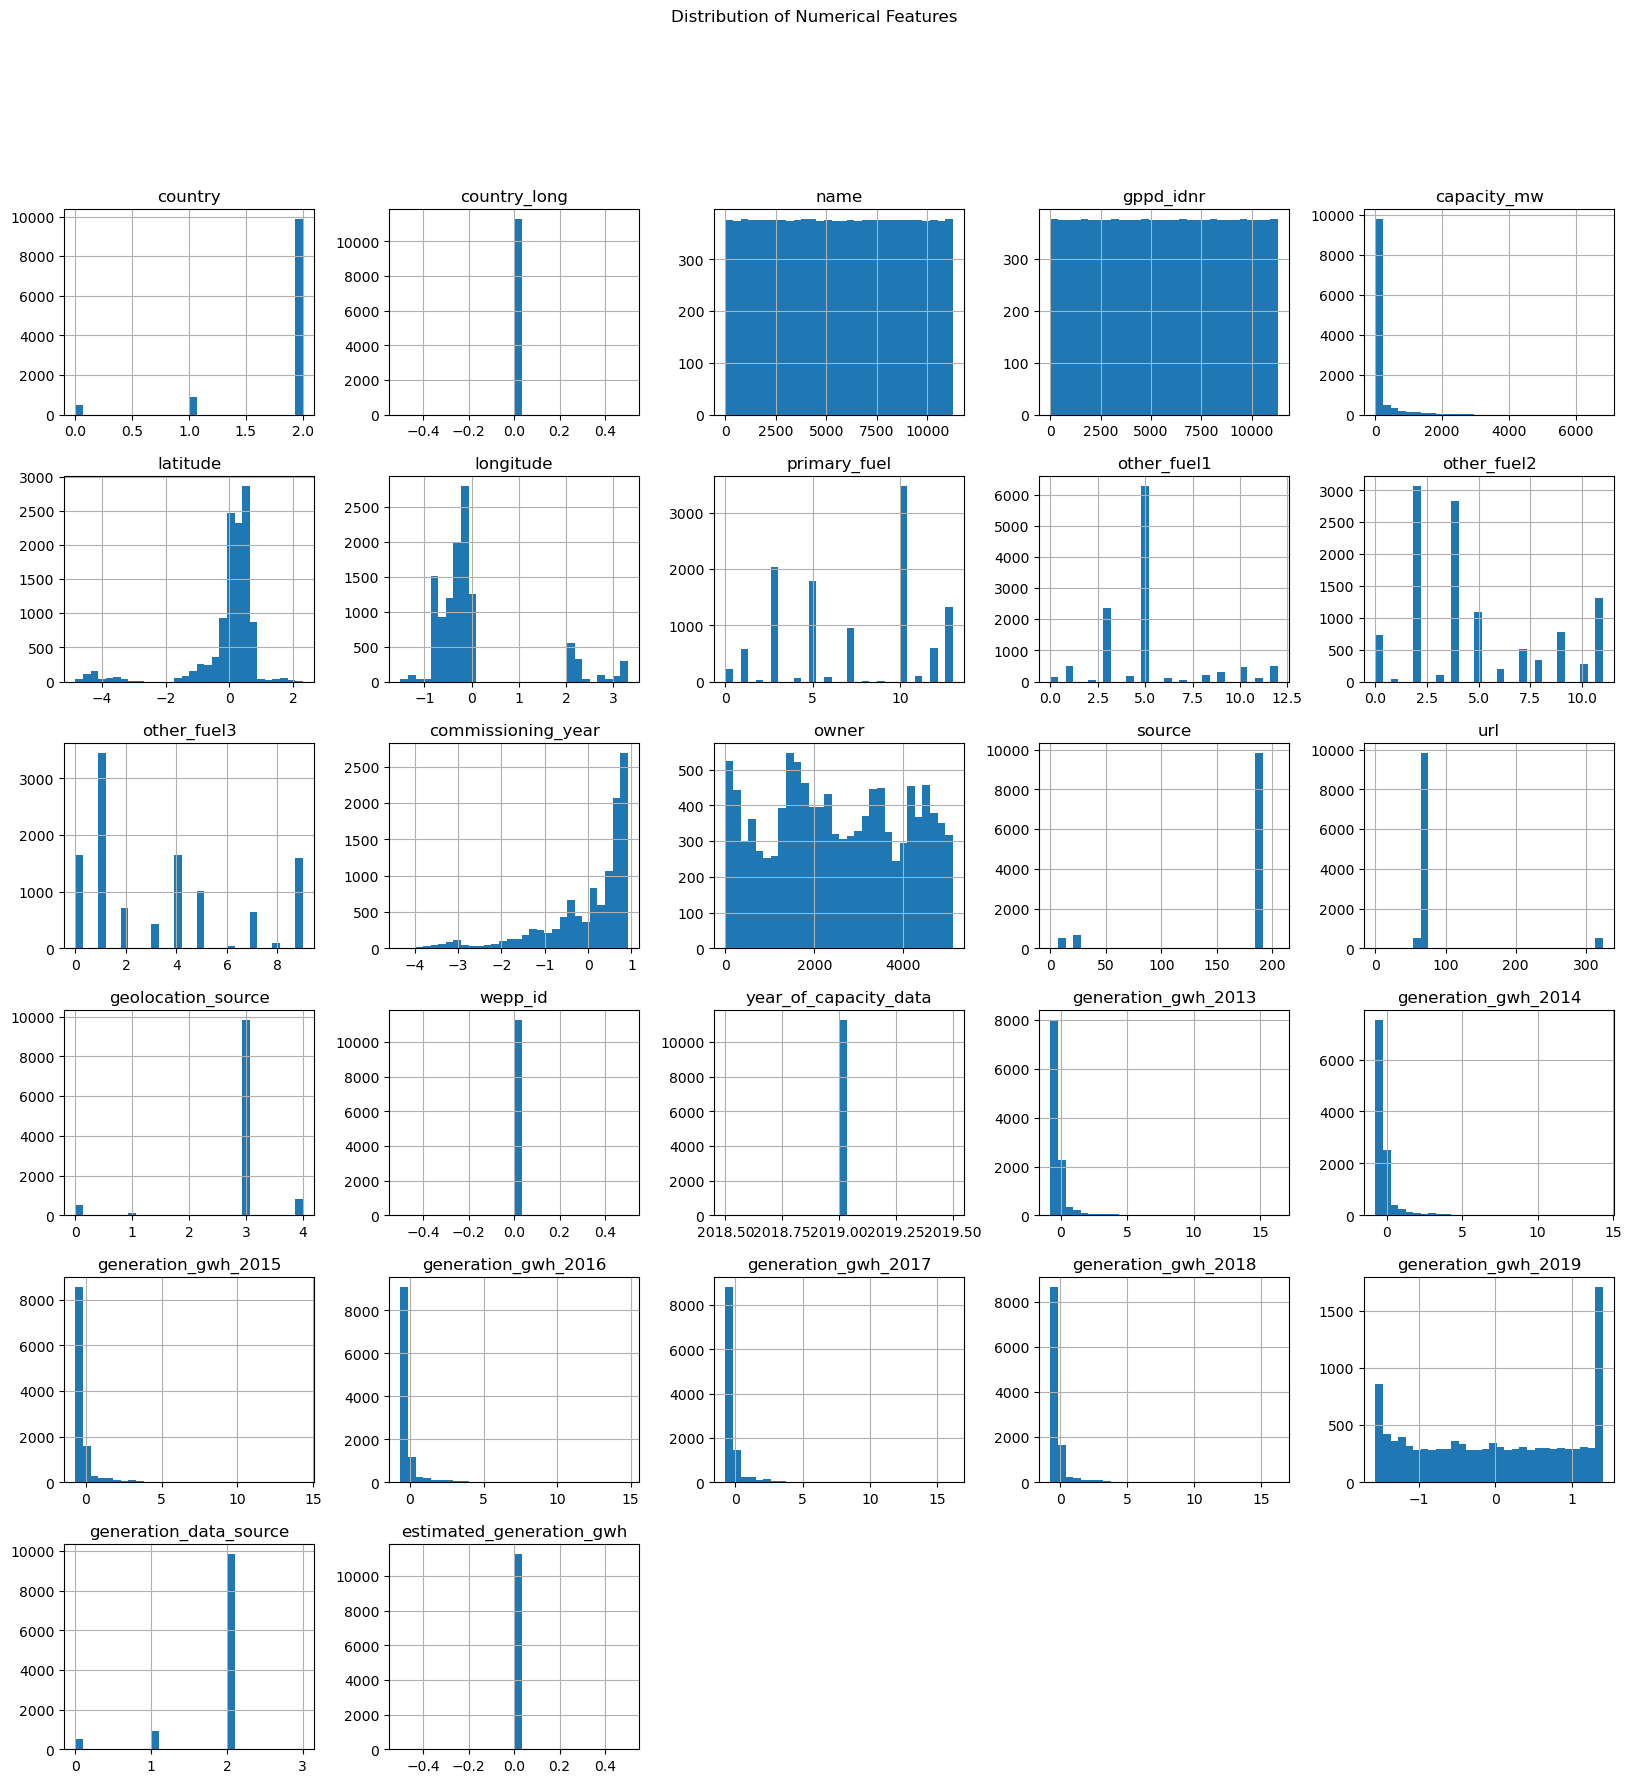

In [63]:
# Plot histograms to visualize skewness
df.hist(bins=30, figsize=(20, 20))
plt.suptitle('Distribution of Numerical Features')
plt.show()

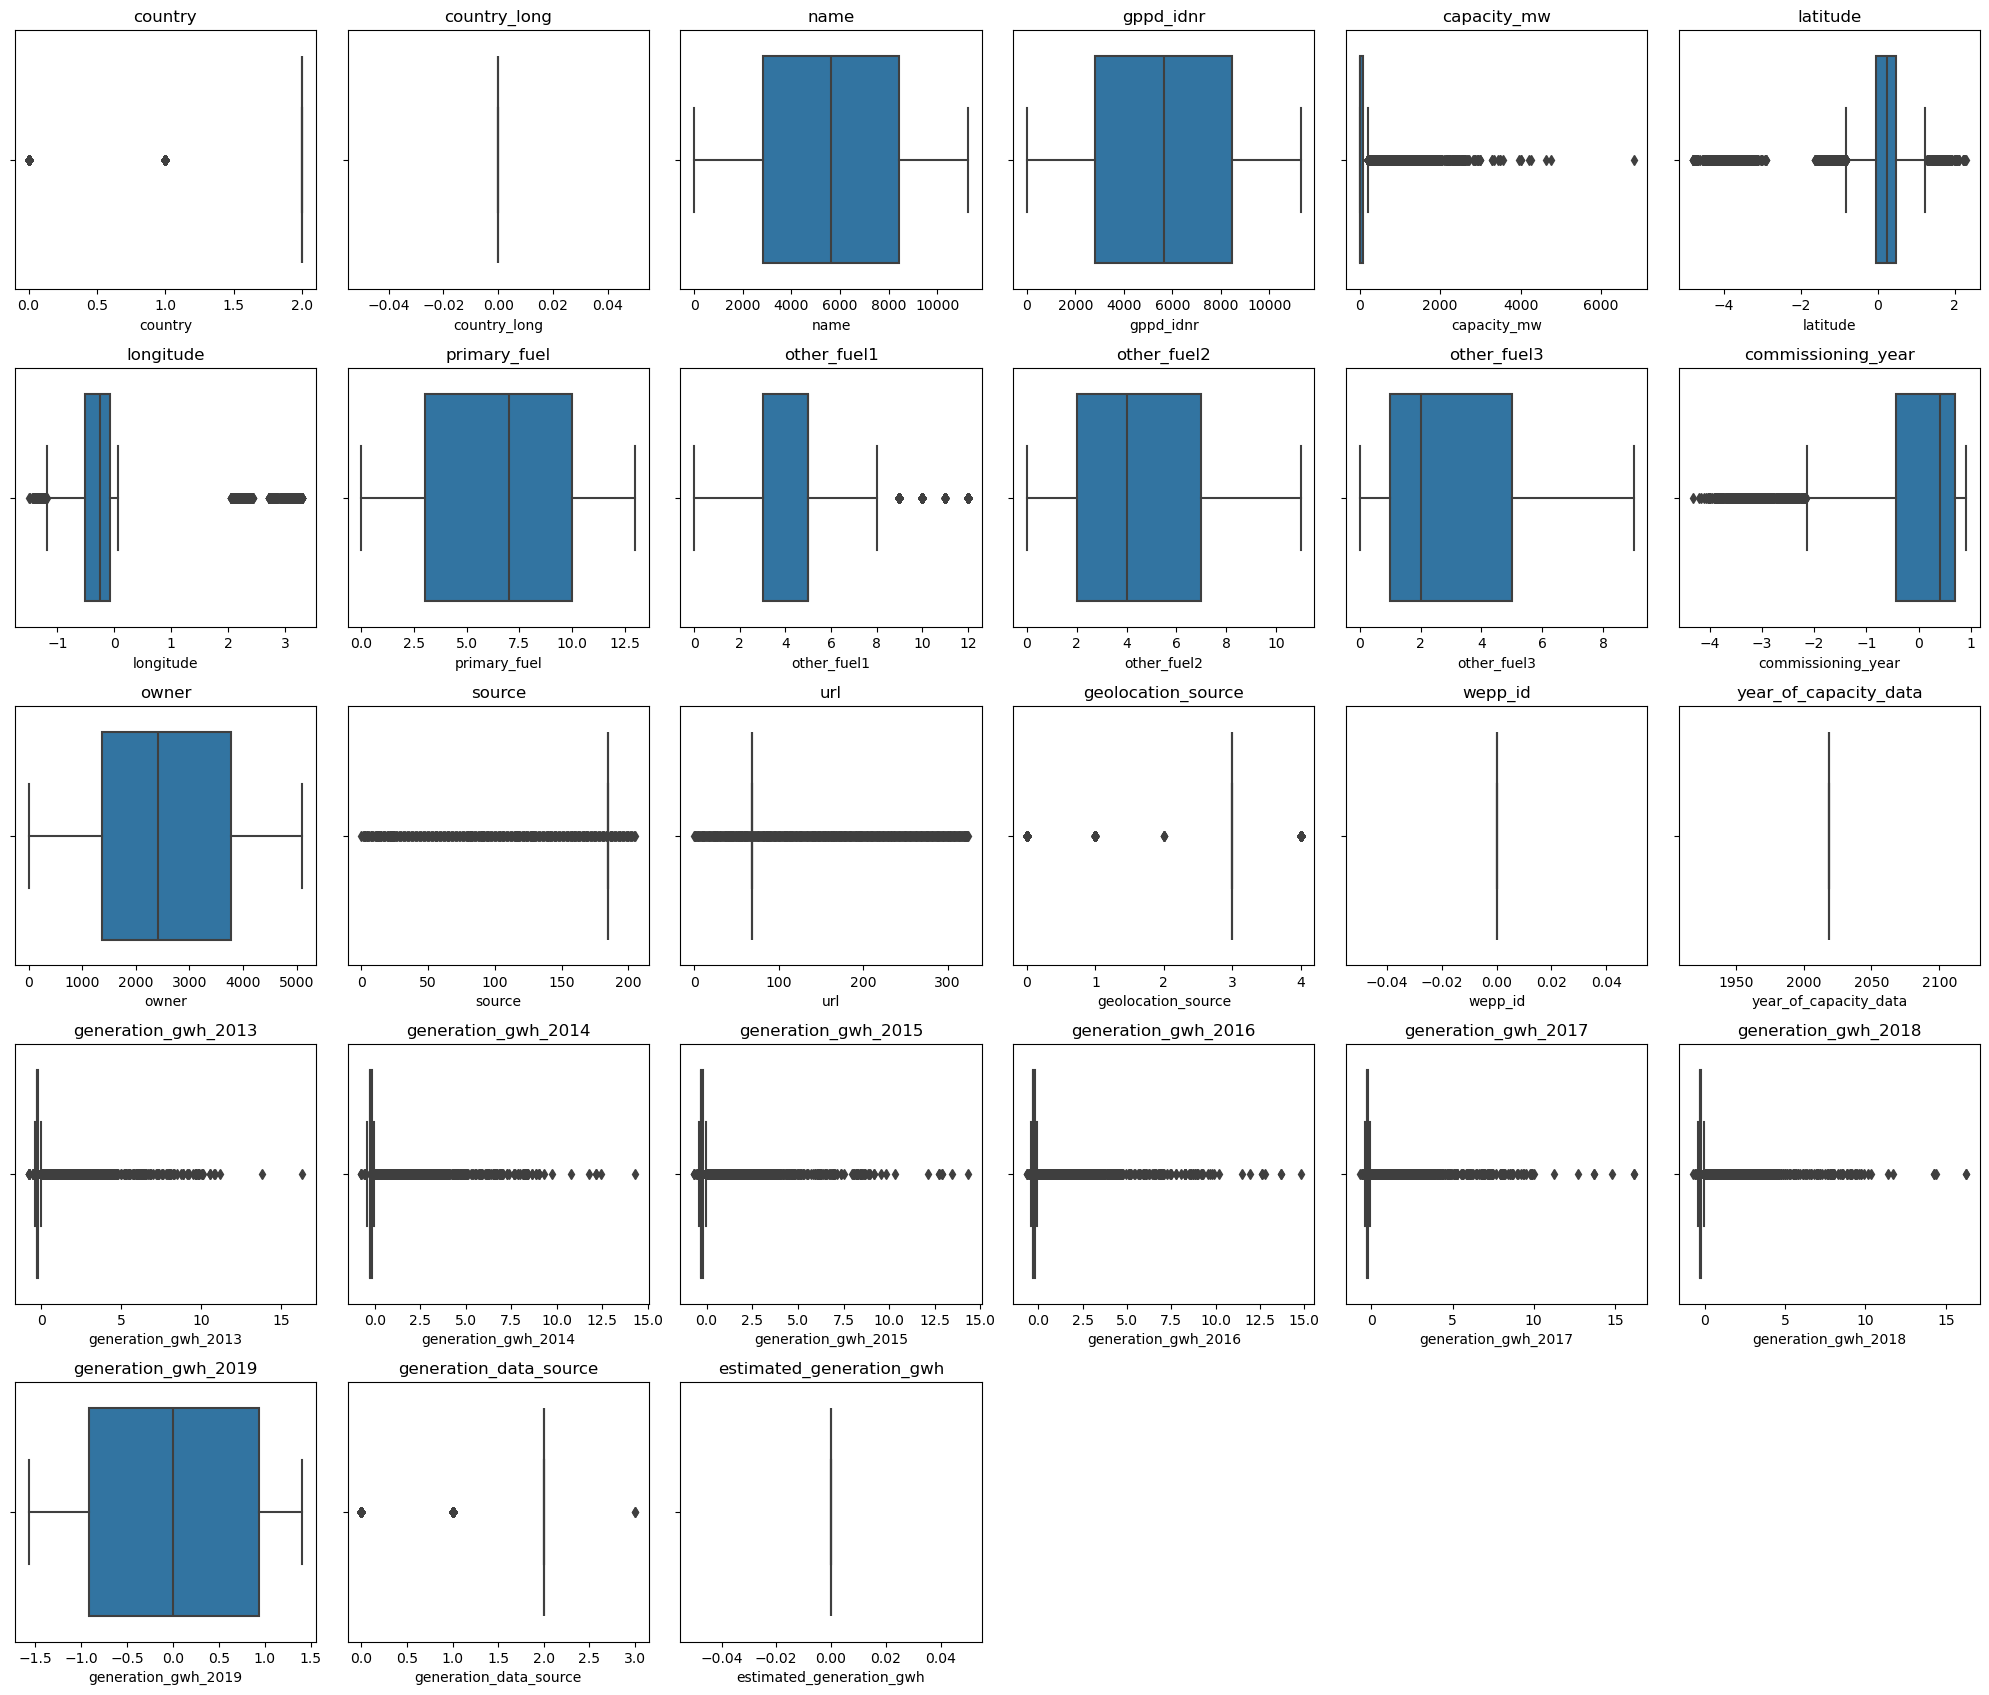

In [65]:
# Box plots to visualize outliers
plt.figure(figsize=(20, 20))
for i, column in enumerate(df, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [66]:
df.corr()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
country,1.000000,NaN,-0.018563,0.333395,-0.078518,0.898139,-0.940761,0.132245,-0.513120,-0.621867,...,NaN,-0.007481,-0.144212,-0.150601,-0.159200,-0.164091,-0.167736,-0.498179,0.995972,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,-0.018563,NaN,1.000000,-0.012825,-0.003390,-0.024207,0.012648,0.010698,0.017937,0.048566,...,NaN,-0.011858,0.000714,0.005699,0.008331,0.010517,0.013016,-0.002306,-0.019462,NaN
gppd_idnr,0.333395,NaN,-0.012825,1.000000,-0.278664,0.303558,-0.256835,0.490575,-0.203397,-0.187406,...,NaN,-0.067244,-0.075286,-0.080180,-0.094258,-0.102291,-0.109917,-0.113773,0.330452,NaN
capacity_mw,-0.078518,NaN,-0.003390,-0.278664,1.000000,-0.070998,0.108969,-0.340851,-0.012558,0.080012,...,NaN,0.555093,0.631389,0.644882,0.667046,0.674306,0.693826,0.143415,-0.078730,NaN
latitude,0.898139,NaN,-0.024207,0.303558,-0.070998,1.000000,-0.804576,0.085310,-0.546846,-0.508265,...,NaN,-0.034518,-0.091375,-0.094292,-0.098865,-0.102624,-0.102922,-0.429968,0.892990,NaN
longitude,-0.940761,NaN,0.012648,-0.256835,0.108969,-0.804576,1.000000,-0.140587,0.415259,0.624461,...,NaN,0.012003,0.182409,0.190272,0.198755,0.203646,0.209360,0.498228,-0.937790,NaN
primary_fuel,0.132245,NaN,0.010698,0.490575,-0.340851,0.085310,-0.140587,1.000000,-0.050937,-0.113899,...,NaN,-0.117295,-0.154042,-0.166950,-0.176755,-0.182117,-0.192670,-0.080723,0.132802,NaN
other_fuel1,-0.513120,NaN,0.017937,-0.203397,-0.012558,-0.546846,0.415259,-0.050937,1.000000,0.206241,...,NaN,-0.005049,-0.004037,-0.000229,0.001896,0.003083,0.000607,0.217114,-0.511188,NaN
other_fuel2,-0.621867,NaN,0.048566,-0.187406,0.080012,-0.508265,0.624461,-0.113899,0.206241,1.000000,...,NaN,-0.006456,0.127434,0.138960,0.147966,0.149273,0.156500,0.342002,-0.620358,NaN


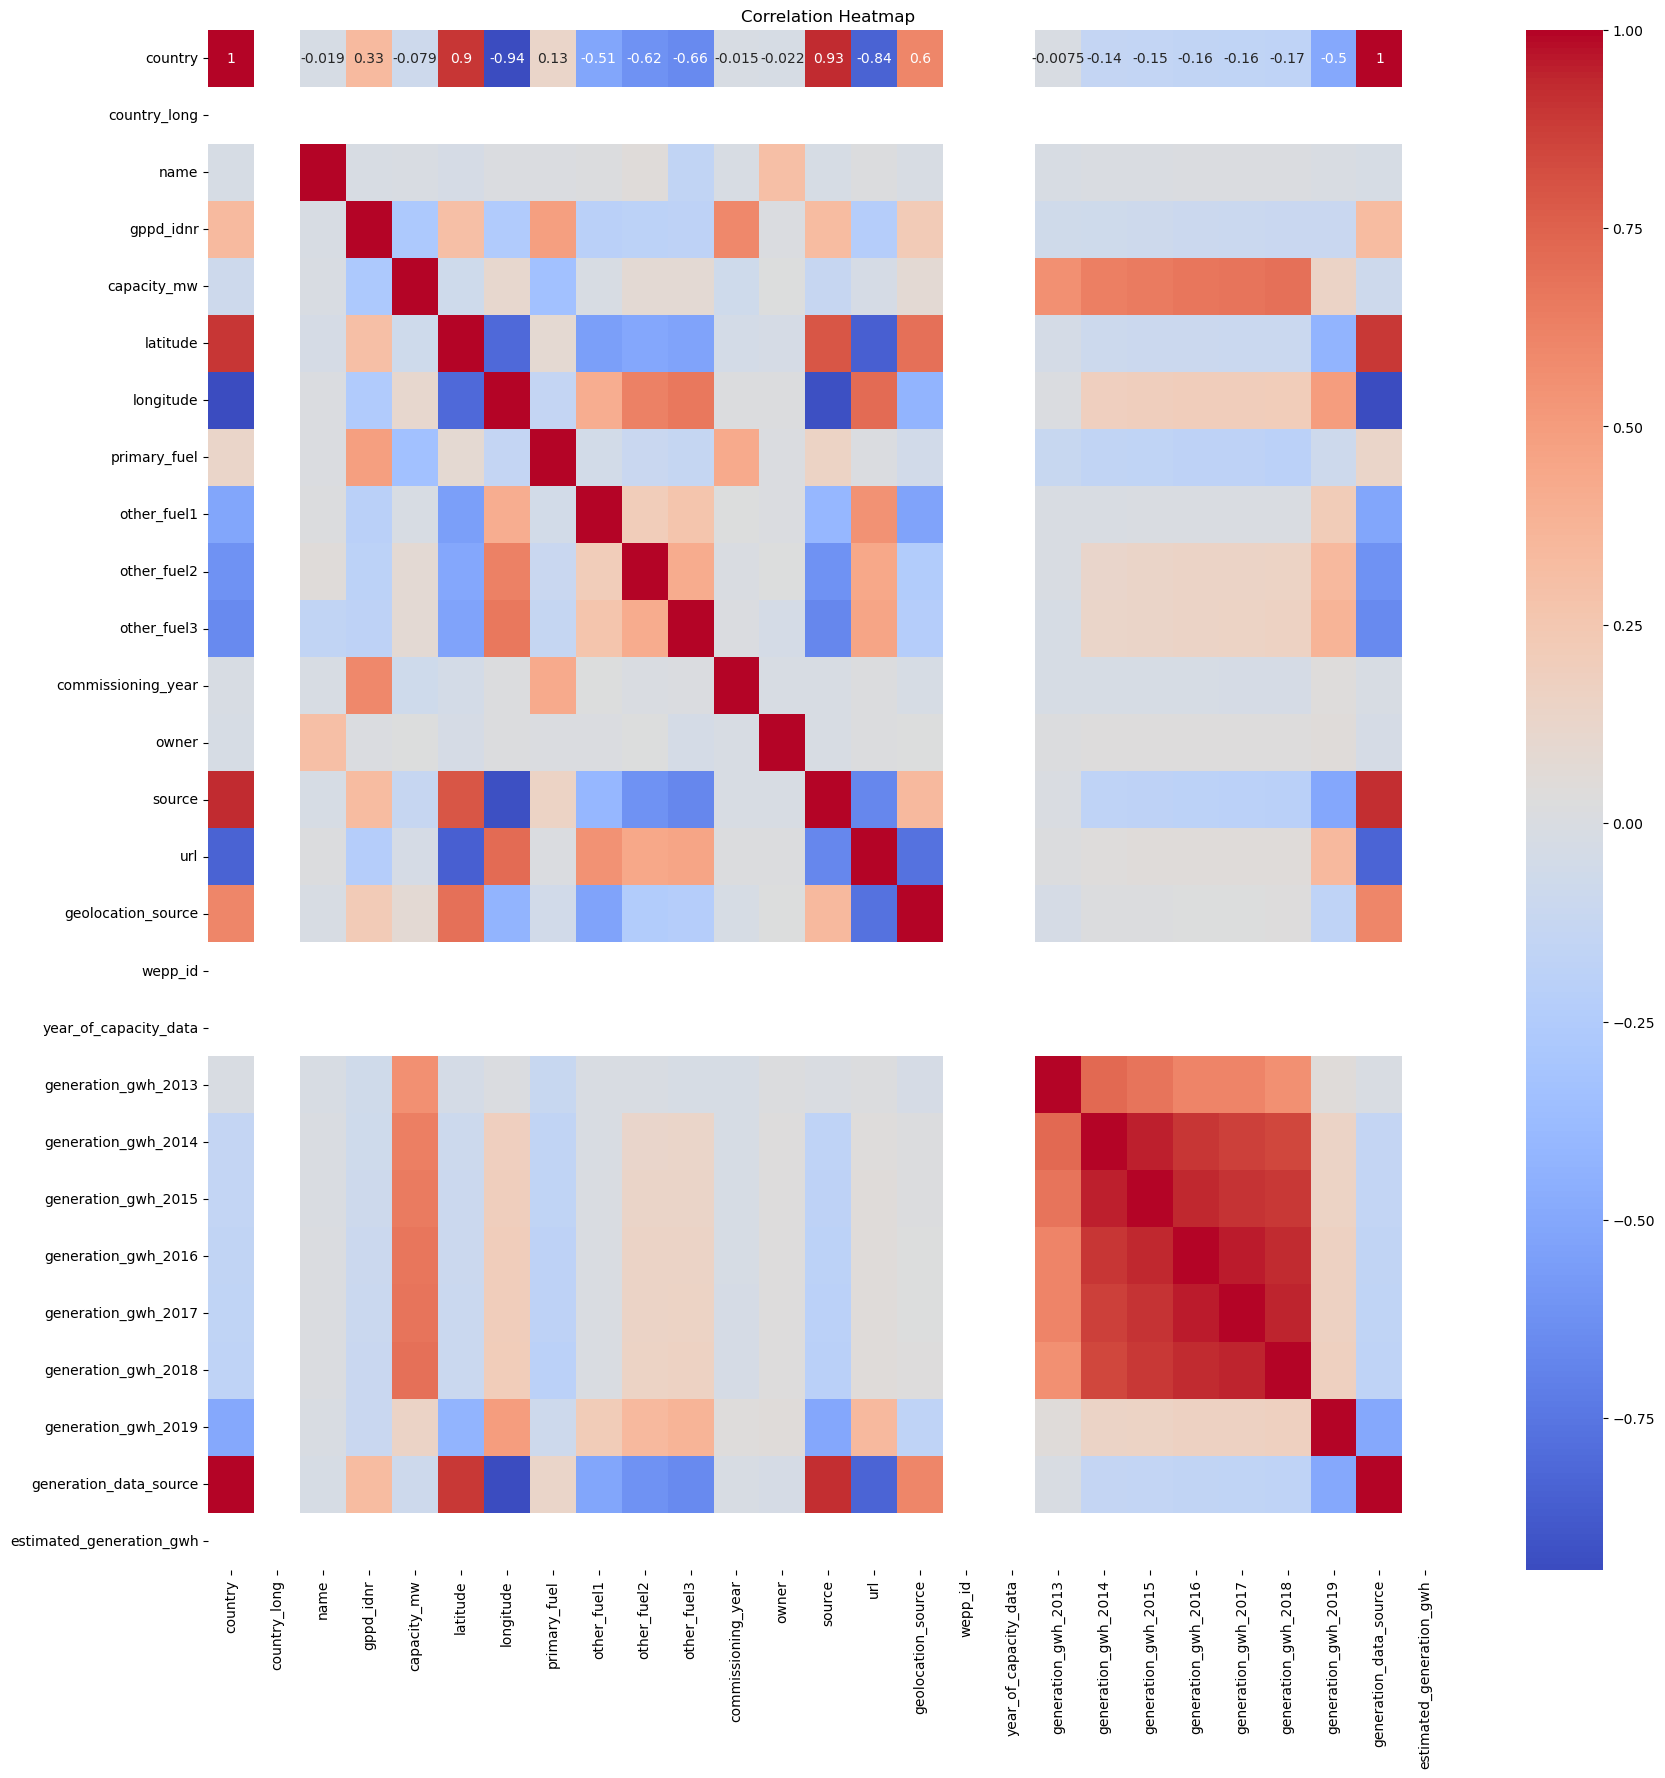

In [67]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to scale
numerical_features = ['latitude', 'longitude', 'commissioning_year'] + \
                     [f'generation_gwh_{year}' for year in range(2013, 2020)]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [70]:
from sklearn.model_selection import train_test_split

# Features (X) and targets (y)
x = df.drop(columns=['primary_fuel', 'capacity_mw'])
y = df['primary_fuel']




In [69]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu =0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('Maximum accuracy is ', maxAccu,'On random_state ',maxRS)

Maximum accuracy is  0.8010038382049011 On random_state  5


In [71]:
#creating tain test split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size= .30, random_state= maxRS)

In [72]:
#CLASSFICATION ALGORITHMS
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [73]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8012990847357544
[[  14    5    0   16    0    5    0    0    0    0   12    0    3    1]
 [   3  125    0   45    0   16    4    1    0    0    2    0    1    2]
 [   0    0    0    7    0    0    0    0    0    0    0    0    1    1]
 [   4   15    0  413    0   34    1   29    0    0   45    0   12   18]
 [   0    0    0   10    4    0    0    0    0    0    3    0    1    3]
 [   0   12    0   26    0  447    2    8    0    0    7    0    3    7]
 [   0   15    0    1    0    0    8    0    0    0    0    0    0    0]
 [   1    3    0   35    0   17    0  223    0    0    9    0    1    3]
 [   1    0    0    1    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    4    0    1    0    0    0    0    0    0    0    0]
 [   0    3    0    2    0    1    0    4    0    0 1066    1   11    5]
 [   0    0    0    0    0    0    0    0    0    0   11   16    0    0]
 [   1    2    0   40    0   14    0    1    0    0   22    0   83   13]
 [   0    1    0   18    0    4 

In [74]:
LR  = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.5060525538824919
[[   0    0    0   25    0    3    0    0    0    0   28    0    0    0]
 [   0    0    0   43    0  126    0    1    0    0   29    0    0    0]
 [   0    0    0    6    0    0    0    1    0    0    2    0    0    0]
 [   0    0    0  285    0  170    0    5    0    0  111    0    0    0]
 [   0    0    0   13    0    2    0    0    0    0    6    0    0    0]
 [   0    0    0  125    0  360    0    6    0    0   21    0    0    0]
 [   0    0    0    4    0   19    0    0    0    0    1    0    0    0]
 [   0    0    0  118    0  130    0    3    0    0   41    0    0    0]
 [   0    0    0    2    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    3    0    2    0    0    0    0    0    0    0    0]
 [   0    0    0   22    0    5    0    0    0    0 1066    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0   26    0    0    0]
 [   0    0    0  103    0   11    0    1    0    0   61    0    0    0]
 [   0    0    0  122    0   10 

In [75]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.51402421021553
[[   0    0    0   21    0    6    0    0    0    0   27    0    0    2]
 [   0    0    0   35    0  133    0    0    0    0   29    0    0    2]
 [   0    0    0    6    0    0    0    0    0    0    2    0    0    1]
 [   0    0    0  251    0  194    0    0    0    0  103    0    0   23]
 [   0    0    0   13    0    2    0    0    0    0    5    0    0    1]
 [   0    0    0   99    0  386    0    0    0    0   17    0    0   10]
 [   0    0    0    1    0   22    0    0    0    0    1    0    0    0]
 [   0    0    0   80    0  163    0    0    0    0   33    0    0   16]
 [   0    0    0    2    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    3    0    2    0    0    0    0    0    0    0    0]
 [   0    0    0    7    0   17    0    0    0    0 1040    0    0   29]
 [   0    0    0    1    0    0    0    0    0    0   26    0    0    0]
 [   0    0    0  100    0   19    0    0    0    0   41    0    0   16]
 [   0    0    0   89    0   24   

In [76]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8010038382049011
[[  13    4    0   17    0    4    0    1    0    0   11    0    1    5]
 [   6  123    0   45    0   13    2    2    1    0    1    0    2    4]
 [   0    0    0    8    0    0    0    0    0    0    0    0    0    1]
 [   3   18    2  399    1   31    2   28    0    1   41    0   14   31]
 [   0    0    0    4   12    0    0    0    0    0    2    0    0    3]
 [   0    6    0   29    0  447    2    5    4    0    6    0    2   11]
 [   0   15    0    1    0    0    8    0    0    0    0    0    0    0]
 [   3    2    3   35    0   13    1  222    1    0    9    2    0    1]
 [   0    0    0    2    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    3    0    0    0    0    0    0    0    0    2    0]
 [   0    1    4    5    1    0    4    3    1    2 1052    3   11    6]
 [   0    0    0    0    0    0    0    1    0    0    9   17    0    0]
 [   4    1    1   35    0   11    0    2    1    0   21    0   85   15]
 [   0    0    0   11    0    2 

In [77]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.505166814289932
[[  0   3   0   0   0  28   0   2   0   0  23   0   0   0]
 [  0  62   0   0   0 108   0   5   0   0  24   0   0   0]
 [  0   0   0   0   0   6   0   1   0   0   2   0   0   0]
 [  0  14   0   0   0 409   0  44   0   0 101   3   0   0]
 [  0   0   0   0   0  13   0   3   0   0   5   0   0   0]
 [  0  11   0   0   0 454   0  27   0   0  20   0   0   0]
 [  0  22   0   0   0   1   0   0   0   0   1   0   0   0]
 [  0   1   0   0   0  79   0 185   0   0  13  14   0   0]
 [  0   0   0   0   0   2   0   0   0   0   1   0   0   0]
 [  0   1   0   0   0   4   0   0   0   0   0   0   0   0]
 [  0  20   0   0   0  30   0   9   0   0 992  42   0   0]
 [  0   0   0   0   0   0   0   4   0   0   5  18   0   0]
 [  0   2   0   0   0 129   0   5   0   0  40   0   0   0]
 [  0  11   0   0   0 152   0   5   0   0 228   3   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.42      0.31      0.36   

In [78]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.7838795394154119
[[  15    5    0   15    0    4    0    1    0    0    7    0    6    3]
 [   5  129    1   32    0   16    6    3    0    0    2    0    3    2]
 [   1    0    0    5    0    0    0    1    0    0    0    0    1    1]
 [   7   21    2  387    0   40    0   26    0    0   38    1   22   27]
 [   1    0    0    6    4    2    0    0    0    0    1    0    2    5]
 [   2   11    1   31    0  436    2    7    0    0    5    0    9    8]
 [   0   16    0    0    0    1    7    0    0    0    0    0    0    0]
 [   0    3    0   52    0   15    0  213    0    0    4    0    2    3]
 [   1    0    0    1    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    2    0    1    0    0    0    0    0    0    2    0]
 [   1    3    0   15    1    0    0    4    0    0 1049    1    8   11]
 [   0    0    0    2    0    0    0    1    0    0    7   17    0    0]
 [   1    2    1   37    1   14    0    3    0    0   19    0   85   13]
 [   0    1    0   24    0    3 

In [79]:
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.7959846471803956
[[  16    2    0   12    0    7    0    0    0    0   15    0    2    2]
 [   5  125    0   36    0   20    3    3    0    0    1    0    3    3]
 [   0    0    0    6    0    2    0    0    0    0    0    0    0    1]
 [   2   11    0  389    0   42    1   33    0    0   58    0   10   25]
 [   0    0    0    8    3    1    0    0    0    0    2    0    1    6]
 [   0   10    0   27    0  448    2   10    0    0    7    0    1    7]
 [   0   12    0    1    0    0   11    0    0    0    0    0    0    0]
 [   0    4    0   29    0   15    0  230    0    0   10    0    0    4]
 [   0    0    0    1    0    1    0    0    0    0    1    0    0    0]
 [   0    0    0    3    0    2    0    0    0    0    0    0    0    0]
 [   0    3    0    2    0    0    0    3    0    0 1068    0   10    7]
 [   0    0    0    1    0    0    0    0    0    0   18    8    0    0]
 [   1    1    0   36    1   16    0    2    0    0   26    0   80   13]
 [   0    1    0   14    0    4 

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
score = cross_val_score(RFC, x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predRFC)-score.mean())

[0.29140833 0.79495128 0.77635075 0.75897209 0.7470093 ]
0.6737383508761052
Difference between Accuracy score and cross val score is -  0.12756073385964917


In [82]:
score = cross_val_score(LR, x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predLR)-score.mean())

[0.46412755 0.48228521 0.50044287 0.496677   0.49091715]
0.48688995519499806
Difference between Accuracy score and cross val score is -  0.01916259868749387


In [83]:
score = cross_val_score(GB, x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predGB)-score.mean())

[0.23560673 0.7639504  0.77325066 0.71112096 0.61763403]
0.6203125558002208
Difference between Accuracy score and cross val score is -  0.18069128240468024


Random forest classifier is our best model as the diff between Accuracy and corss val score is the least.

In [87]:
#Hyper Parameter tuning 
#Random forst Classifier 
from sklearn.model_selection import GridSearchCV

parameters = {    'criterion': ['gini', 'entropy'],
    'random_state': [10, 20],
    'max_depth': [10, 20], 
    'n_jobs': [-2, 1], 
    'n_estimators': [10, 50] 
} 

In [88]:
GCV =GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [89]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20], 'n_estimators': [10, 50],
                         'n_jobs': [-2, 1], 'random_state': [10, 20]})

In [90]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [93]:
Final_model = RandomForestClassifier(criterion= 'entropy', max_depth= 10, n_estimators= 50, n_jobs= -2, random_state= 10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print("Primary fuel accuracy is :",acc*100)

Primary fuel accuracy is : 76.82314732801889


In [96]:
from sklearn.model_selection import train_test_split

# Features (X) and targets (y)
X = df.drop(columns=['primary_fuel', 'capacity_mw'])
y_capacity = df['capacity_mw']



In [97]:
# Split data for capacity prediction (regression)
X_train_capacity, X_test_capacity, y_train_capacity, y_test_capacity = train_test_split(X, y_capacity, test_size=0.2, random_state=42)

In [99]:
# Initialize the regressor
capacity_model = RandomForestRegressor(random_state=42)

# Train the regressor
capacity_model.fit(X_train_capacity, y_train_capacity)

# Predict on the test set
y_pred_capacity = capacity_model.predict(X_test_capacity)

# Evaluate the regressor
capacity_mse = mean_squared_error(y_test_capacity, y_pred_capacity)
capacity_rmse = mean_squared_error(y_test_capacity, y_pred_capacity, squared=False)
capacity_r2 = r2_score(y_test_capacity, y_pred_capacity)

print(f'Capacity Prediction Mean Squared Error (MSE): {capacity_mse}')
print(f'Capacity Prediction Root Mean Squared Error (RMSE): {capacity_rmse}')
print(f'Capacity Prediction R² Score: {capacity_r2*100}')


Capacity Prediction Mean Squared Error (MSE): 22158.799609701604
Capacity Prediction Root Mean Squared Error (RMSE): 148.85832059277575
Capacity Prediction R² Score: 83.21508750005653


So, the model is predicting the accuracy of 83.21% for capacity in mw and 76.82% for primary fuel